In [1]:
import matplotlib.pyplot as plt
from data_readers.Small_norb_reader import SmallNORBDataset




#dataset = SmallNORBDataset(dataset_root='/home/erik/Documents/Projects/CapsuleNetwork/small_NORB_data')

NameError: name 'dataset' is not defined

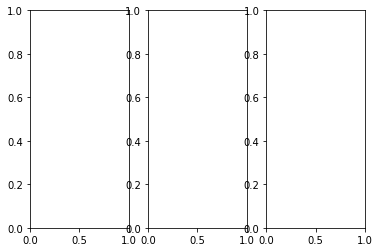

In [2]:
# import numpy as np
# import cv2
# import torch
# import sys
# import pickle


# subplots = plt.subplots(nrows=1, ncols=3)

# print("Dataset size: {}".format(sys.getsizeof(dataset)))
# print(type(dataset))
# print(dataset.n_examples)
# print(dataset.categories)
# datapoint= dataset.data["train"][0]
# print("Datapoint size: {}".format(sys.getsizeof(datapoint)))
# print(datapoint.show(subplots))
# print("Train Data lenght: ",len(dataset.data["train"]))
# print("Test Data lenght: ",len(dataset.data["train"]))
# print("Data category:",datapoint.category)
# print("Azimuth",datapoint.azimuth)
# print("Elevation",datapoint.elevation)
# print("Instance",datapoint.instance)
# print("image_lt",np.array(datapoint.image_lt).shape)
# print("image_lr",np.array(datapoint.image_rt).shape)


# small = cv2.resize(datapoint.image_lt, dsize=(50, 50), interpolation=cv2.INTER_CUBIC)

# plt.imshow(datapoint.image_lt)
# plt.imshow(small)

# #with open("pickledump.obj","wb") as f:
#     #pickle.dump(dataset,f)
# #for dp in dataset.data["train"]:
#     #print(dp.category)

# plt.close("all")

### CUSTOM DATALOADER ###

In [12]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import os, os.path
from itertools import islice

onlyfiles = next(os.walk("/home/erik/Documents/Projects/CapsuleNetwork/small_NORB_data/Processed/Test/"))[2]
print ("Number of examples",len(onlyfiles))


#with open("/home/erik/Documents/Projects/CapsuleNetwork/small_NORB_data/Processed/pickledump.obj","rb") as f:
    #df = pickle.load(f)

rt = "/home/erik/Documents/Projects/CapsuleNetwork/small_NORB_data/Processed/"
#for item in enumerate(df.data["test"]):
    #name = rt+"Test/"+"testes_"+str(item[0])
    #with open(name,"wb") as f:        
        #pickle.dump(item[1],f)

with open("/home/erik/Documents/Projects/CapsuleNetwork/small_NORB_data/Processed/Test/testes_1439","rb") as f:
    dp = pickle.load(f)
    print(type(dp))
    print(dp.category)
    plt.imshow(dp.image_lt)
    plt.close("all")
    

# print(type(df))
class myNORBreader(Dataset):
    def __init__(self,root,train,transform=False):
        self.train = train
        self.root = root
        self.foldier = root+self._set_data()
        self.file_base_name = self._set_file_base()
               
        
    def _set_data(self):
        if self.train:
            d = "Processed/Train/"
        else:
            d = "Processed/Test/"     
        return d
    
    def _set_file_base(self):
        if self.train:
            n = "traines_"
        else:
            n = "testes_"
        return n        
    
    def __len__(self):
        no_files = next(os.walk(self.foldier))[2]
        return(len(no_files))
    
    def __getitem__(self,idx):
        path = self.foldier+self.file_base_name+str(idx)
        with open(path,"rb") as f:
            data_point = pickle.load(f)
            sample = {"image":data_point.image_lt,"tag":data_point.category}
        return(sample)

class myNORBloader(DataLoader):
    def __init__(self,dataset,*args,**kwargs):
        super().__init__(dataset,*args,**kwargs)
        self.categories = {"animal":0,"human":1,"airplane":2,"truck":3,"car":4}
        
    
        

print("Test custom class----------------------------")
loader = myNORBreader("../small_NORB_data/",True)
print(loader.__len__())

Number of examples 24300
<class 'data_readers.Small_norb_reader.SmallNORBExample'>
4
Test custom class----------------------------
24300


In [8]:
%%timeit
for i in range(100):
    d = loader[i]


5.28 ms ± 3.05 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
data_loader = myNORBloader(loader,batch_size=10,shuffle=True)

{'animal': 0, 'human': 1, 'airplane': 2, 'truck': 3, 'car': 4}
Axes: 5
0
<class 'dict'>
Image tag: torch.Size([10])
Image:  torch.Size([10, 96, 96])
1
<class 'dict'>
Image tag: torch.Size([10])
Image:  torch.Size([10, 96, 96])
2
<class 'dict'>
Image tag: torch.Size([10])
Image:  torch.Size([10, 96, 96])
3
<class 'dict'>
Image tag: torch.Size([10])
Image:  torch.Size([10, 96, 96])
4
<class 'dict'>
Image tag: torch.Size([10])
Image:  torch.Size([10, 96, 96])


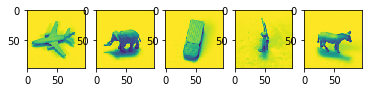

In [11]:
print(data_loader.categories)
plt.close("all")
fig, axes = plt.subplots(nrows=1, ncols=5)
print("Axes:",len(axes))

for i_batch, sample_batched in islice(enumerate(data_loader),None,5,None):
    print(i_batch)
    print(type(sample_batched))
    print("Image tag:",sample_batched["tag"].size())
    print("Image: ",sample_batched["image"].size())
    axes[i_batch].imshow(sample_batched["image"].numpy()[0])
    